# Q3: Even deeper! Resnet18 for PASCAL classification (15 pts)

Hopefully we all got much better accuracy with the deeper model! Since 2012, much deeper architectures have been proposed. [ResNet](https://arxiv.org/abs/1512.03385) is one of the popular ones. In this task, we attempt to further improve the performance with the “very deep” ResNet-18 architecture.


## 3.1 Build ResNet-18 (1 pts)
Write a network modules for the Resnet-18 architecture (refer to the original paper). You can use `torchvision.models` for this section, so it should be very easy! 
Do not load the pretrained weights for this question. We will get to that in the next question.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import matplotlib.pyplot as plt
%matplotlib inline

import trainer
from utils import ARGS
from simple_cnn import SimpleCNN
from voc_dataset import VOCDataset


# you could write the whole class....
# or one line :D
ResNet = models.resnet18

## 3.2 Add Tensorboard Summaries (6 pts)
You should've already written tensorboard summary generation code into `trainer.py` from q1. However, you probably just added the most basic summary features. Please implement the more advanced summaries listed here:
* training loss (should be done)
* testing MAP curves (should be done)
* learning rate
* [histogram of gradients](https://www.tensorflow.org/api_docs/python/tf/summary/histogram)

## 3.3 Train and Test (8 pts)
Use the same hyperparameter settings from Task 2, and train the model for 50 epochs. Tune hyperparameters properly to get mAP around 0.5. Report tensorboard screenshots for *all* of the summaries listed above (for image summaries show screenshots at $n \geq 3$ iterations). For the histograms, include the screenshots of the gradients of layer1.1.conv1.weight and layer4.0.bn2.bias.

**REMEMBER TO SAVE A MODEL AT THE END OF TRAINING**

In [2]:
args = ARGS(lr=0.001, gamma=0.875, epochs=50, log_every=250, val_every=250, test_batch_size=512, batch_size=32, use_cuda=True)
model = nn.Sequential(ResNet(), nn.Sigmoid())
model[0].fc = nn.Linear(512, 20)
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, args.step_size, gamma=args.gamma)
test_ap, test_map = trainer.train(args, model, optimizer, scheduler, model_name='resnet_scratch')
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.688458
0.08056013123039628
Train Epoch: 1 [250 (59%)]	Loss: 0.207289
0.19369932969348108
Train Epoch: 3 [500 (18%)]	Loss: 0.165179
0.24129273070398694
Train Epoch: 4 [750 (78%)]	Loss: 0.166618
0.2914690526842999
Train Epoch: 6 [1000 (37%)]	Loss: 0.180516
0.32696730589792555
Train Epoch: 7 [1250 (96%)]	Loss: 0.181079
0.33650263841865513
Train Epoch: 9 [1500 (55%)]	Loss: 0.137413
0.3896580987865251
Train Epoch: 11 [1750 (15%)]	Loss: 0.145514
0.41077113781918184
Train Epoch: 12 [2000 (74%)]	Loss: 0.163915
0.4309862924880952
Train Epoch: 14 [2250 (33%)]	Loss: 0.137167
0.43199099463757645
Train Epoch: 15 [2500 (92%)]	Loss: 0.123929
0.45671356130161955
Train Epoch: 17 [2750 (52%)]	Loss: 0.135618
0.46101131060291795
Train Epoch: 19 [3000 (11%)]	Loss: 0.101740
0.48304875963039784
Train Epoch: 20 [3250 (70%)]	Loss: 0.105733
0.4789194153899964
Train Epoch: 22 [3500 (29%)]	Loss: 0.100793
0.48592370297543336
Train Epoch: 23 [3750 (89%)]	Loss: 0.086307
0.486866070852

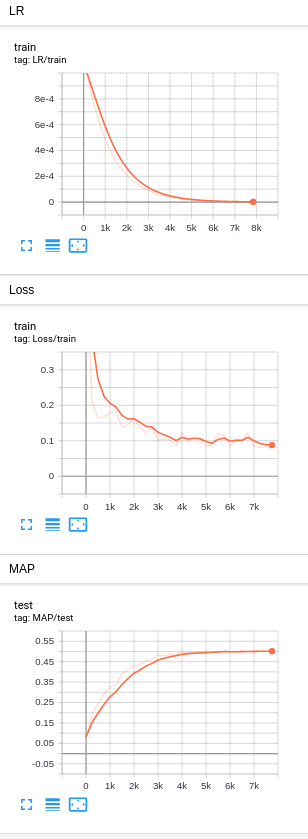

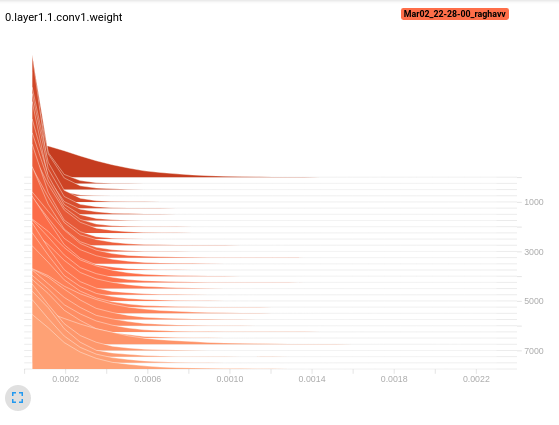

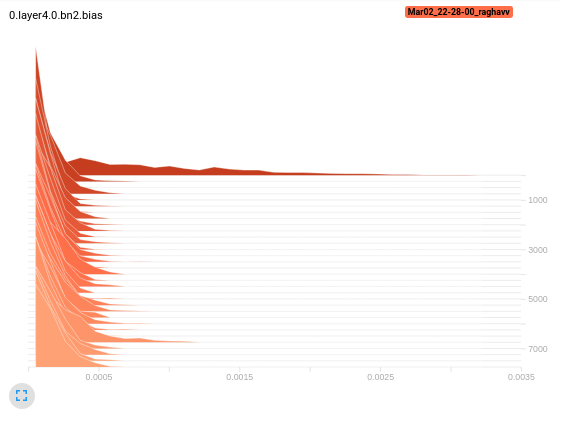